## TIME FOR SOME ANALYSIS

In [1]:
import pandas as pd
import os
import json
import yfinance as yf # THIS API IS SO COOL, HAS EVERYTHING I NEED
from lets_plot import *
LetsPlot.setup_html()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer #sentiment analysis
from bs4 import BeautifulSoup # scraping tool for getting news articles
import time
import requests
from datetime import datetime, time
import pytz
import sqlite3

<Axes: title={'center': 'Oil Sentiment Over Time'}, xlabel='Years', ylabel='Sentiment Score'>

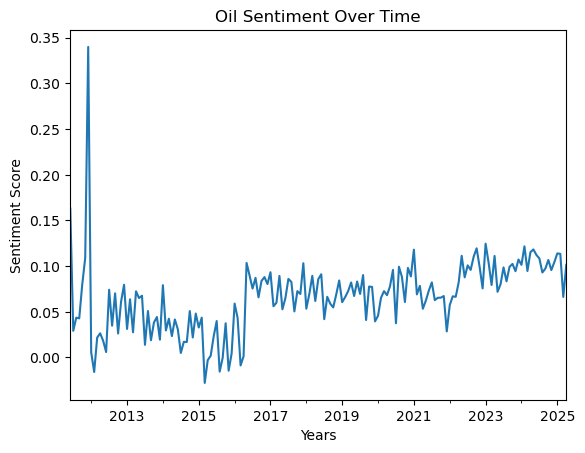

In [32]:
# loading in our csv data into the pandas data frame

df = pd.read_csv('oil_data.csv')

df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.tz_convert(None)

df["Year and Month"] = df['Date'].dt.to_period('M')
df_monthly_sentiment = df.groupby('Year and Month')['Sentiment'].mean().reset_index()
df_monthly_sentiment.set_index('Year and Month', inplace=True)

first_valid_index = df_monthly_sentiment['Sentiment'].first_valid_index()

df_monthly_sentiment = df_monthly_sentiment.loc[first_valid_index:]

df_monthly_sentiment['Sentiment'].plot(title='Oil Sentiment Over Time', xlabel='Years', ylabel = "Sentiment Score")